# Final Assignment REPORT from IBM_C9_Cource_Weeks_4+5

#### The CODE Section one can find here: [https://github.com/Bobushka/Coursera_Capstone]

**Performed by: Boris Yushenkov**

**When: 2021-02**

**Where: St-Petersburg, Russia**

**To: for whom it may concern**

## Table Of Contents

#### 1. Introduction 

#### 2. Data Section

#### 3. Methodology Section

#### 4. Results Section

#### 5. Discussion Section

#### 6. Conclusion

## 1. Introduction 
[The business problem and who would be interested in this project]

#### Let's assume that someone is looking to open a restaurant in Toronto, Ontario, Canada. What exact location should I recommend this person to choose?

A simple answer is to find a specific Neighborhood where:
- market segment competition is lowest,
- population density is highest,
- average income is highest.

#### The idea of the Project is to collect nesessary data and to use K-means approach to analyse the location selected.

#### This Project can be interesting for:
- IBM and Coursera staff: (what for??)
- my peers: to exchange ideas/knowledge of DS/ML.
- myself: to fill my Github repo, it's better than nothing...

## 2. Data Section

[Description of the data that will be used to solve the problem and the source of the data]

I collected the initial data for the project from two sources.

The first source is the **"Demographics_of_Toronto_neighborhoods"** wiki site: https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods

There you can find a lot of interesting data for each Toronto neighborhood. A list of these datatypes can be found as the names of the columns in the table below. Data from the wiki table was parsed using the **"BeautifulSoup"** library. The method returns 156 neighborhoods in total. Of these, 143 are suitable for further processing. Geolocation of neighborhoods was carried out through the address string, using the "geocode" method from **"geolocator"** library.

In [2]:
import pandas as pd
df_Toronto_Neighborhoods = pd.read_csv(
    r'/Users/borisyushenkov/Desktop/DS_ML_NN/IBM/C9_Capstone/Final_assignment/Toronto_Neighborhoods.csv', 
    index_col=0)
df_Toronto_Neighborhood"

,Neighborhood,Population,Land area (km2),Density (people/km2),Change in Population since 2001 (%),Average Income (CAD),Transit Commuting %,Renters (%),Second language after English,Latitude,Longitude
0,Agincourt,44.577,12.45,3580.0,4.6,25.750,11.1,5.9,Cantonese (19.3%),43.785353,-79.278549
1,Alexandra Park,4.355,0.32,13609.0,0.0,19.687,13.8,28.0,Cantonese (17.9%),43.650787,-79.404318
2,Allenby,2.513,0.58,4333.0,-1.0,245.592,5.2,3.4,Russian (1.4%),43.712849,-79.547065
3,Amesbury,17.318,3.51,4934.0,1.1,27.546,16.4,19.7,Spanish (6.1%),43.706162,-79.483492
4,Armour Heights,4.384,2.29,1914.0,2.0,116.651,10.8,16.1,Russian (9.4%),43.743944,-79.430851
...,...,...,...,...,...,...,...,...,...,...,...
141,Woburn,48.507,13.34,3636.0,-1.5,26.190,13.3,16.0,Gujarati (9.1%),43.759824,-79.225291
142,Wychwood,4.182,0.68,6150.0,-2.0,53.613,17.1,20.1,Portuguese (2.7%),43.682171,-79.423113
143,York Mills,17.564,7.29,2409.0,2.0,92.099,10.0,11.8,Korean (4.0%),43.744039,-79.406657
144,York University Heights,26.140,13.21,1979.0,-1.2,24.432,15.2,20.4,Italian (6.6%),43.758781,-79.519434


The second data source was **Forsquare.com**. With "food" search query one can get a plenty of information. After deleting matches, a list of 684 venues remains. While cleaning dataset we left only id, name, category and location of venues. 

A serious problem with parsing was the limit on the return of 50 records. Therefore, we had to create a search cycle in all Toronto neighborhoods with an experimentally selected search radius of 1 km. After going through the entire loop, the complete venues list returned included 1054 records. Аfter eliminating repetitions, the final list includes 684 lines.

The summary table with the "Toronto's food venues" list is shown below.

In [6]:
df_venues = pd.read_csv(
    r'/Users/borisyushenkov/Desktop/DS_ML_NN/IBM/C9_Capstone/Final_assignment/Toronto_venues_food_1km.csv', 
    index_col=0)
df_venues

,id,name,categories,location.lat,location.lng
0,50fb1994e4b0d5fd052ed832,King's Vegetarian Food 觀自在,Grocery Store,43.786749,-79.270004
1,4d862b8ef1e56ea85e38988a,Midtown Food Court,Food Court,43.785134,-79.278878
2,4dbc40d7815439392f9cf0ce,大泉港式快餐 Great Fountain Fast Food,Food Court,43.786835,-79.277400
3,4bdc7e67fed22d7ffd6c58c9,Dynasty Centre Food Court,Food Court,43.786869,-79.277407
4,4c6dd5dd06ed6dcbd338a522,Rainbow Food,Chinese Restaurant,43.784946,-79.277958
...,...,...,...,...,...
679,4c5704a330d82d7f30dbd862,M&M Food Market,Grocery Store,43.757220,-79.234778
680,4f380d00e4b039c3c31e1dd4,Harry's West Indian Fine Foods,Grocery Store,43.759580,-79.223818
681,5856dbaf52a0510ab8aaf845,Jian Hing Foodmart,Supermarket,43.760999,-79.226707
682,4bd2111477b29c7455e88d82,Kitchen Food Fair,Convenience Store,43.751298,-79.401393


## 3. Methodology Section

[Discuss and describe any exploratory data analysis performed, any inferential statistical testing performed, if any, and what machine learnings were used and why]

A very simple approach was used in this research. **The choice of the restaurant location in the first approximation depends on two things**:
- competition in the nearest environment
- purchasing power of neighborhood's residents

My guess was that if we study

- the distribution and density of existing restaurants in Toronto, as well as

- the density of residents and their average income in different neighborhoods, then

we will be able to conclude which neighborhood is best suited to host the new restaurant. Obviously, such a neighborhood will be one in which competition is low and purchasing power is high.

The level of competition **was determined visually using a map** of the location of all found Toronto venues.

The level of population purchasing power **was estimated using the k-means method** in the three-dimensional space of parameters:

- the first two parameters are the latitude and longitude of the neighborhood location

- the third parameter is the purchasing power of the population of the neighborhood, obtained as the product of the density of residents per square kilometer and their average income.

Based on the results of k-means method, the resulting clusters were grouped according to the average purchasing power of all neighbors in the cluster in descending order. Here you can see the Neighborhoods listed in the prime classifier, i.e. classifier with the largest value of persuasing pover:

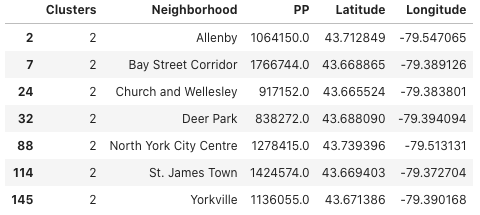

The first classifier on the list was mapped. Those neighborhoods that fell into it **were visually analyzed for coincidence with the minimum density of competing venues plotted on the same map**.

You can see an example of the final map in the Results section.

## 4. Results Section

[Section where you discuss the results]

The analysis shows that despite the large number of restaurants in Toronto (684), there are two neighborhoods in which the density of restaurants is low, and the purchasing power of the population in autumn is high in comparison with other neighborhoods.
This neighborhood are Allenby and North York City Center. They are located in the North-Wester part of the map, shown below.

My recommendation would be to locate the new restaurant in these neighborhoods as the most suitable for this purpose.

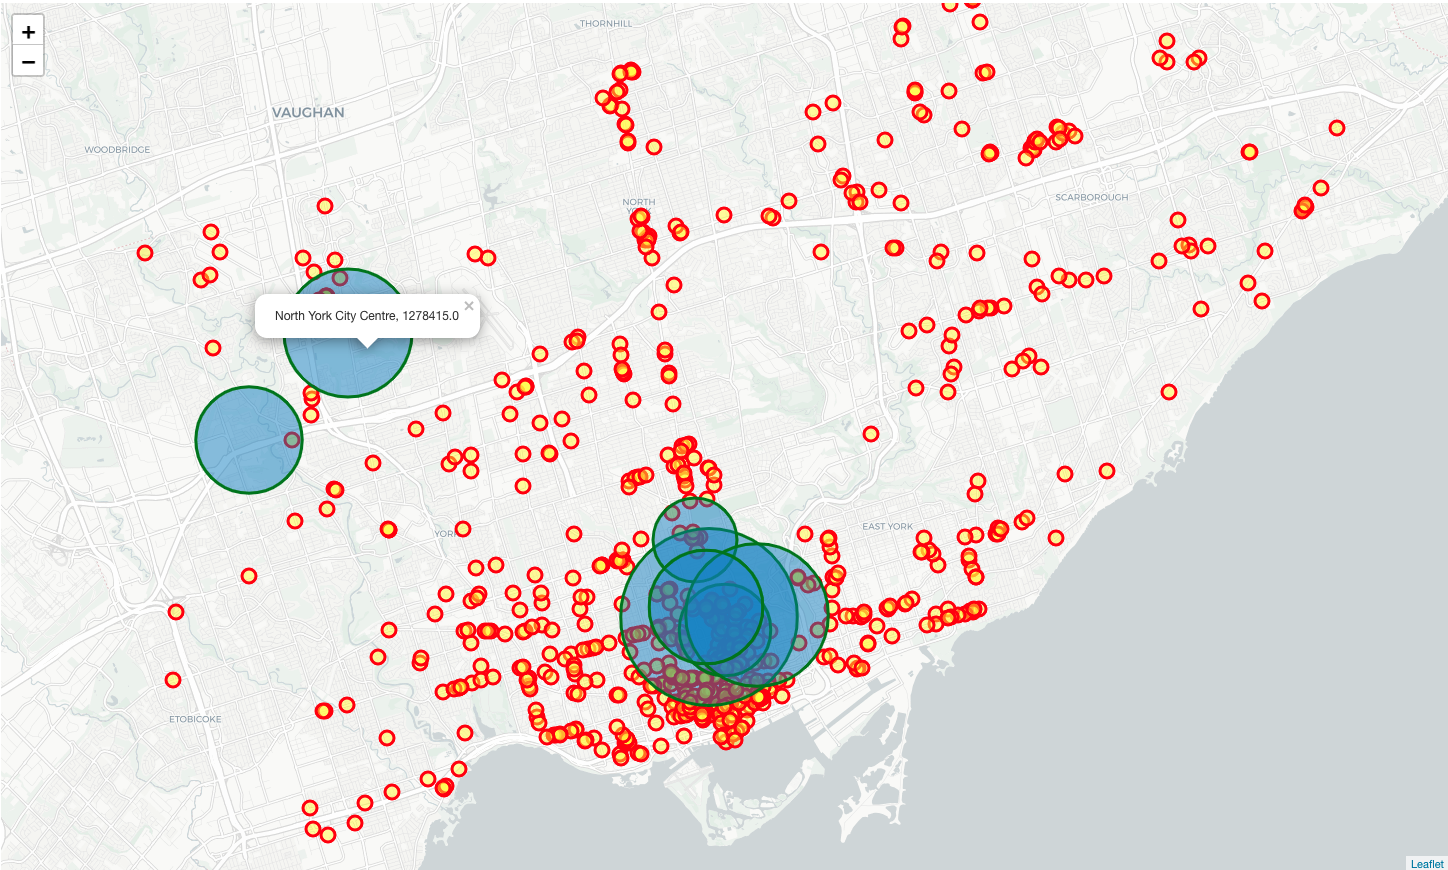

## 5. Discussion Section 

[Discuss any observations noted and any recommendations based on the results]

The approach used is the simplest approximation to the goal.
The approach can be further enhanced as follows:

1. Differentiate restaurants by type of cuisine, information about which is already in the received data. If we consider competition not in general, but among restaurants of the same type, then more precise recommendations can be given.

2. Explore additional data contained in the information from the wiki (such as: "Change in Population", "Transit Commuting", "% of Renters", "Second most common language (after English)"). Such data may indirectly indicate the characteristics of the population of a particular neighborhood. For example, "the second language" can suggest which type of cuisine residents of this neighborhood might prefer.

3. Introduce quantitative metrics for assessing competition density and distance ratios between restaurants and neighborhoods. Now such an assessment was made visually by the map, but in a more serious study this process should be digitized and algorithmized.

## 6. Conclusion

[Conclude the basics of the report]

The purpose of this work was to recommend locations in Toronto that are interesting for a new restaurant.
The unit of analysis was the neighborhood, of which there are about 150 in Toronto.
An approach was chosen based on comparing the density of existing competition (the number of restaurants in each neighborhood) versus the purchasing power of the population (population density times average income) in each neighborhood.
The less the density of competition, but at the same time the higher the purchasing power, the better the neighborhood is suitable for placing a restaurant.
The required data was obtained from two sources: Wiki (parsing and subsequent determination of geo coordinates) and Foursqueare (a list of restaurants throughout Toronto).

The k-means method was used for clustering Neigborhoods in 3-dimensial space. Mapping was also used to visually compare the density of competition and compare the minimum of competition with the most promising neighborhoods.

The method identified a cluster of neighborhoods with the highest purchasing power in Toronto. Two of these communities ended up in an area with low competition density. These two neighborhoods were eventually recommended for the new restaurant.

They are:
- Allenby
- North York City Center

## Thanks for your attention!